# Course 3 Introduction to Git and Github
# Week 1 Keeping Historical Copies
## Course Introduction
For the examples in this course, we'll show a bunch of different Python scripts. While you don't need to know any Python to use Git, we do recommend that you have a basic knowledge of the language, so that you can understand the examples and the functionality we'll be demonstrating. If you've done the courses on Python in this program, you're covered. If you haven't, that's okay. But you might need to freshen up your Python skills to follow some of our examples. Also, since all the scripts will use Python 3, you'll need to have Python 3 installed in your computer to run them. For our examples, we're going to use a Linux computer, interacting with the Linux command line through the most common command line tools. Again, if you joined us for the Python courses, you're already familiar with all these concepts. If you're jumping into this program with this course, you might benefit from reviewing some of the most basic Linux commands. Please remember, some of these topics and videos are a little complex, so they might not 100 percent sink in the first time around. That's totally natural. Take your time, and review any content that's not completely clear. You'll get the hang of it eventually. Also, don't forget that you can use the discussion forums to connect with your fellow learners and ask questions anytime you need. All right. Ready to get started learning about Git and version control. Let's get to it.

## Before version control
### Intro to Module 1: Version Control
Once you have Git installed in your computer, we'll do an overview of the basic Git workflow which will let you start keeping track of your scripts. So are you ready to start taking control of your code? Here we go

### Keeping Historical Copies


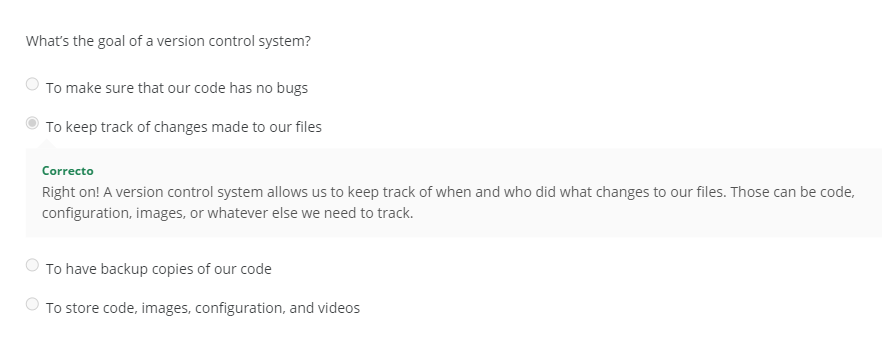

### Diffing Files
You can use some nifty tools that will do this automatically. We can use the diff command line tool to take two files or even to directories, and show the differences between them in a few formats. Let's check it out with an example. We have two files rearrange 1.py and rearrange 2.py which contain two different versions of the same function. Let's take a look at them using CAT.

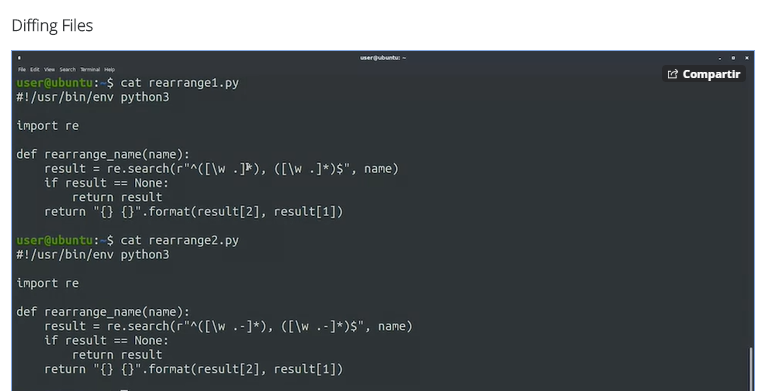

When we call the diff command, we get only the lines that are different between two files. It's much easier to find the difference when we just have two lines. See the symbols at the beginning of each of those lines? The less than symbol tells us that the first line was removed from the first file, and the greater than symbol tells us that the second line was added to the second file. In other words, the old line got replaced by the new one. In this example, we had one line that was replaced with a new one. This is a common change when modifying code, but not the only possibility. Let's check out another example.
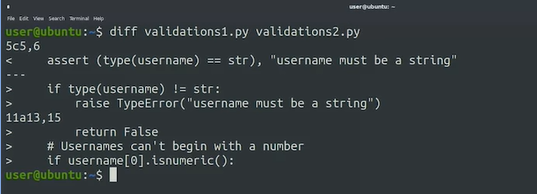

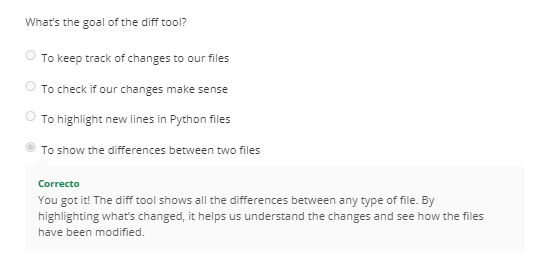

### Applying Changes
Imagine a colleague sends you a script with a bug and asked you to help fix the issue. Once you understood what was wrong with the script, you could describe to them what they need to change. Something like, "Well, you can only return values inside functions. I think you meant to use sys.exit instead. Also, you're converting to gigabytes twice, so your script will always fail." But this could still be hard for them to understand if the code is complex. To make the change clear, you could send them a diff with the change so that they can see what the modified code looks like. To do this, we typically use a command line like diff-u old_file new_ file > change.diff. As a reminder, the greater than sign redirects the output of the diff command to a file. So with this command, we're generating a file called change.diff with the contents of diff-u command. By using the -u flag, we include more context which helps the person reading the file understand what's going on with the change. The generated file is usually referred to as a diff file or sometimes a patch file. It includes all the changes between the old file and the new one, plus the additional context needed to understand the changes and to apply those changes back to the original file. Now, say you're the one receiving a diff file with a change and you want to apply it to a script you wrote. You could read the diff file you receive carefully and then manually go through the file that needs to be changed, and apply the modifications. But it sounds like a lot of manual work that could be automated, don't you think? Well, it sure is. There's a command called patch to do exactly this. Patch takes a file generated by diff and applies the changes to the original file. Let's check this out in an example. Say we have a small script that checks whether the computer is under too much load, like this one.

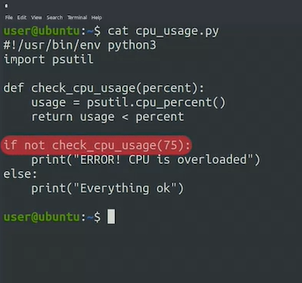

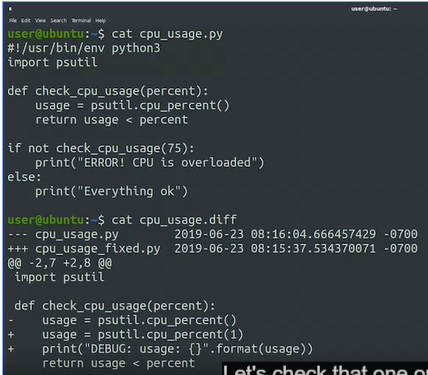
So we told patch to apply the changes that come from cpu_usage.diff to our cpu_usage.py file. We get one single line that says the file was patched, which means that we've successfully applied the changes. Let's verify that by looking at the contents of our script.


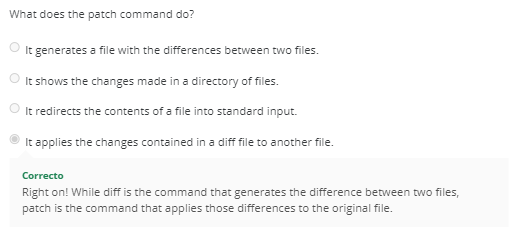

# Practical Application of diff and patch

Imagine this, a colleague is asking our help with fixing a script named disk_usage.py. The goal of the script is to check how much disk space is currently used, and print an error if it's too little space for normal operation. But the script is currently broken because it has a few bugs. We’ll help our colleague fix those bugs to demonstrate how to use diff and patch. Before we change anything, let’s make a couple copies of the script. We'll add _original to one copy, which we’ll keep unmodified and use for comparison and _fixed to the other copy, which we’ll use to repair our fix.

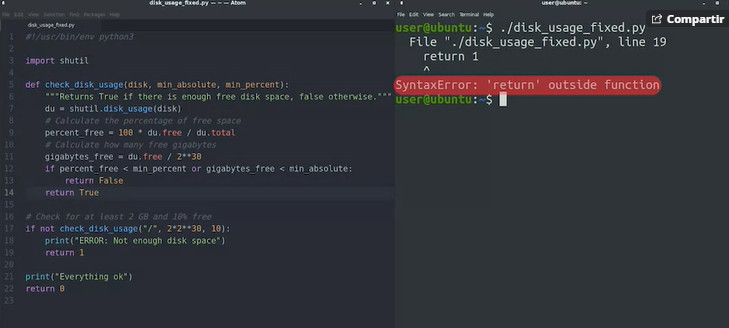
You might remember that in Python, we can only use return statements inside functions. So how do we fix this? There's a couple options. We could turn the current code into a function and then call that function from the main part of our script. Or we could use sys.exit to make the return number of the exit code of our script, which is the code that causes a program to exit with the corresponding exit value. For now, let's go with the second option.

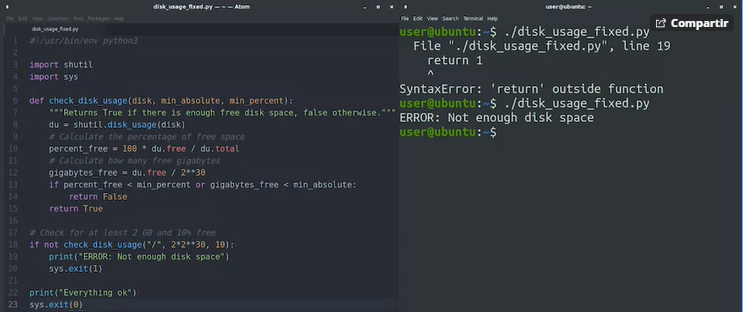
Darn, we fixed the syntax error, but now the script is telling us we don't have enough space on our disk. But we know that we actually do have some free space, right? What's up with that? If you look closely at the code, you might notice that the script is converting to gigabytes twice.

It works now. Okay, now we need to send a fixed to our colleague so that they can fix their script.
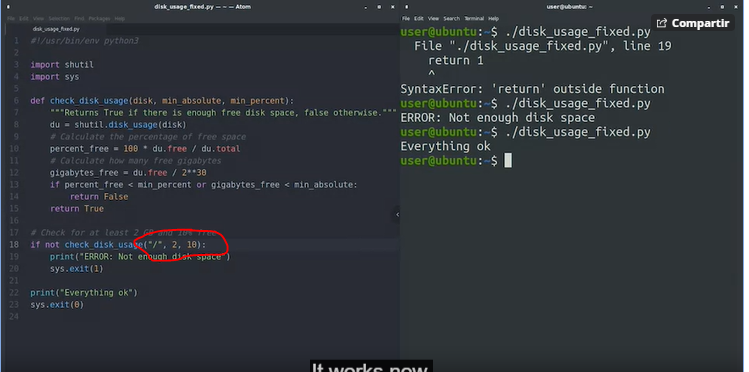

To do that, we'll use a technique we just learned to generate a diff file, like this.
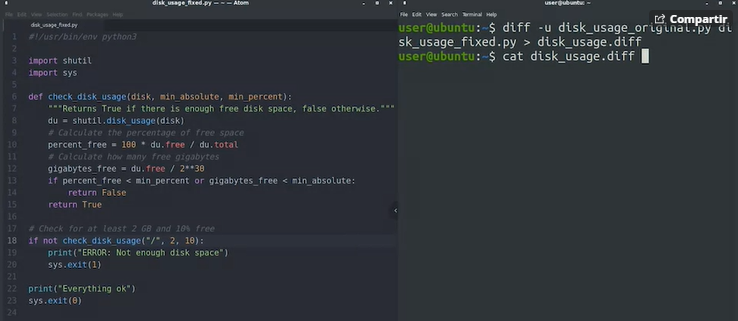

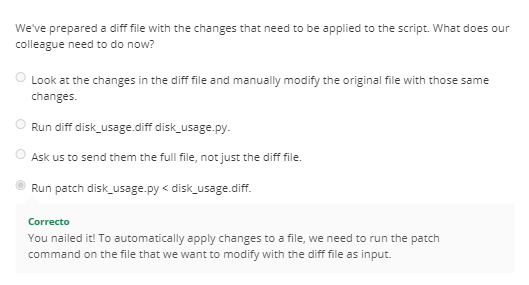

By calling patch with the diff file, we've applied the changes that were necessary to fix the bugs. Let's check that disk_usage.py now executes successf
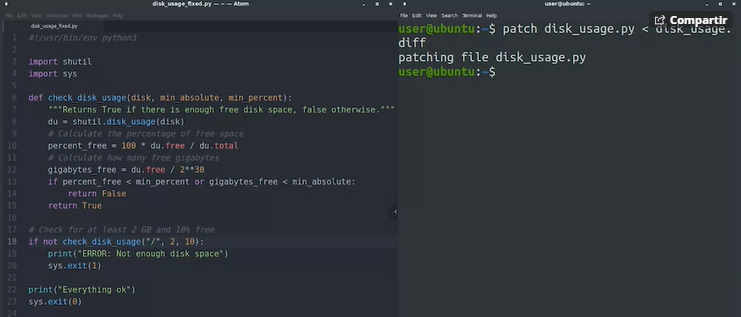

 So we've now seen how we can look at differences between files, generate diff files together to gather our changes, and then apply those changes using patch. But this is still a very manual process, where version control systems can really help. But before we jump into that, in the next cheat sheet, you'll find a summary of the commands we just covered. So check that out and then head over to the practice quiz to make sure you've got a grasp on all this.
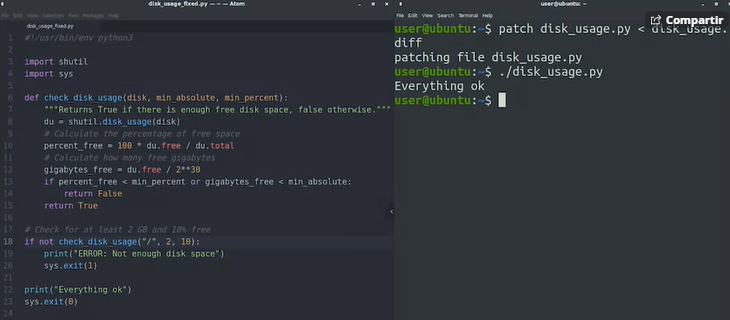

### diff and patch Cheat Sheet

diff -u

diff -u is used to compare two files, line by line, and have the differing lines compared side-by-side in the same output. See 
below:

~$ cat menu1.txt 
Menu1:

Apples

Bananas

Oranges

Pears

~$ cat menu2.txt 
Menu:

Apples

Bananas

Grapes

Strawberries

~$ diff -u menu1.txt menu2.txt 

--- menu1.txt   2019-12-16 18:46:13.794879924 +0900

+++ menu2.txt   2019-12-16 18:46:42.090995670 +0900

@@ -1,6 +1,6 @@

-Menu1:

+Menu:
 
 Apples

Bananas

-Oranges

-Pears

+Grapes

+Strawberries

Patch
Patch is useful for applying file differences. See the below example, which compares two files. The comparison is saved as a .diff file, which is then patched to the original file!

~$ cat hello_world.txt 

Hello World

~$ cat hello_world_long.txt 

Hello World

It's a wonderful day!

~$ diff -u hello_world.txt hello_world_long.txt 

--- hello_world.txt     2019-12-16 19:24:12.556102821 +0900

+++ hello_world_long.txt        2019-12-16 19:24:38.944207773 +0900

@@ -1 +1,3 @@

Hello World

+

+It's a wonderful day!

~$ diff -u hello_world.txt hello_world_long.txt > hello_world.diff

~$ patch < hello_world.diff 

patching file hello_world.txt

~$ cat hello_world.txt 

Hello World

It's a wonderful day!

There are some other interesting patch and diff commands such as patch -p1, diff -r !

Check them out in the following references:

http://man7.org/linux/man-pages/man1/diff.1.html

http://man7.org/linux/man-pages/man1/patch.1.html






### Practice Quiz Before Version Control.txt
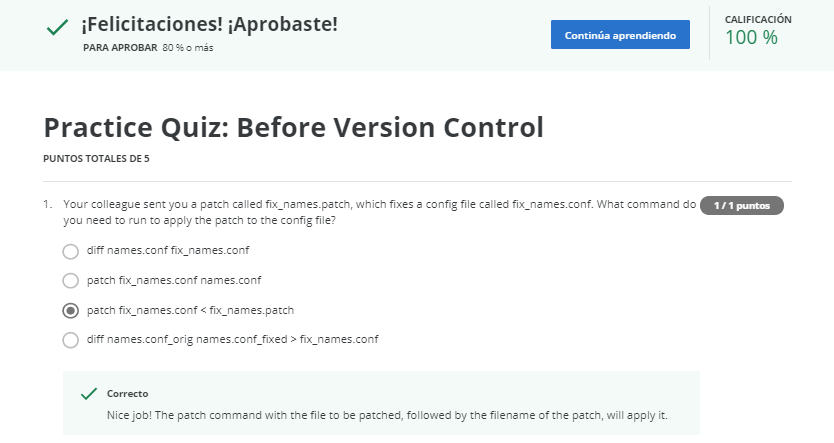

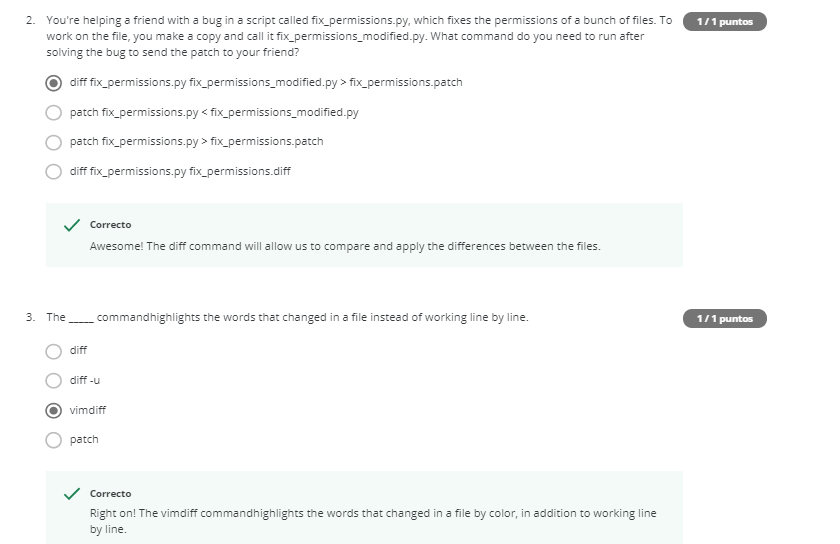

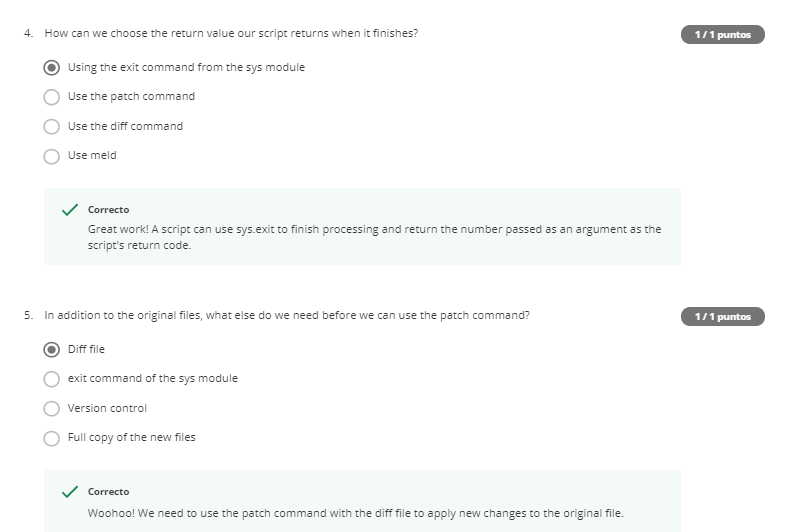

## Version Control Systems
### Practice Quiz: Version Control Systems
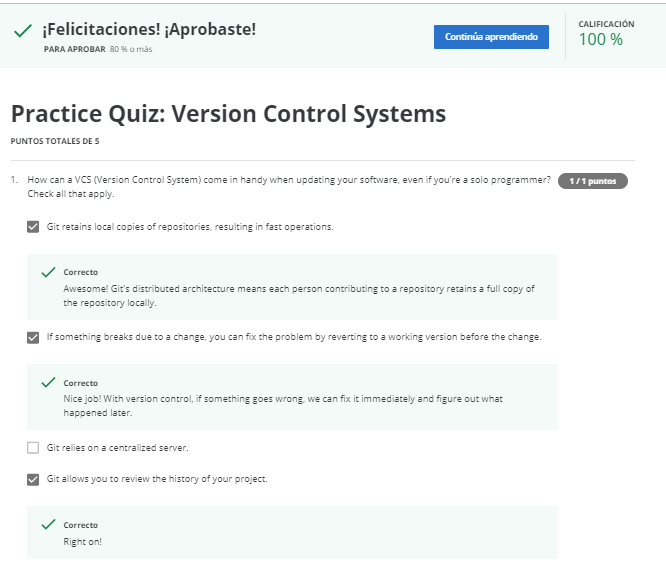

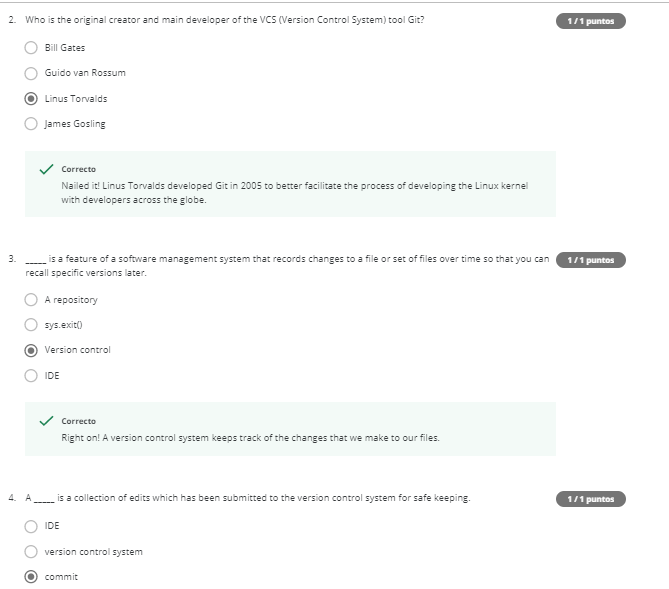

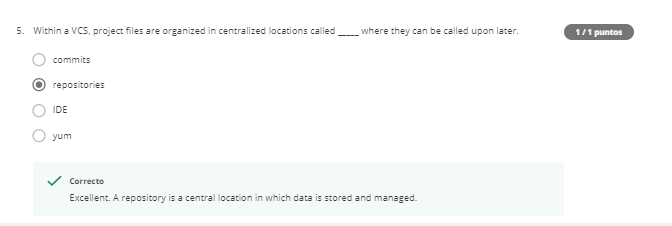

## Using Git
### Practice Quiz: Using Git

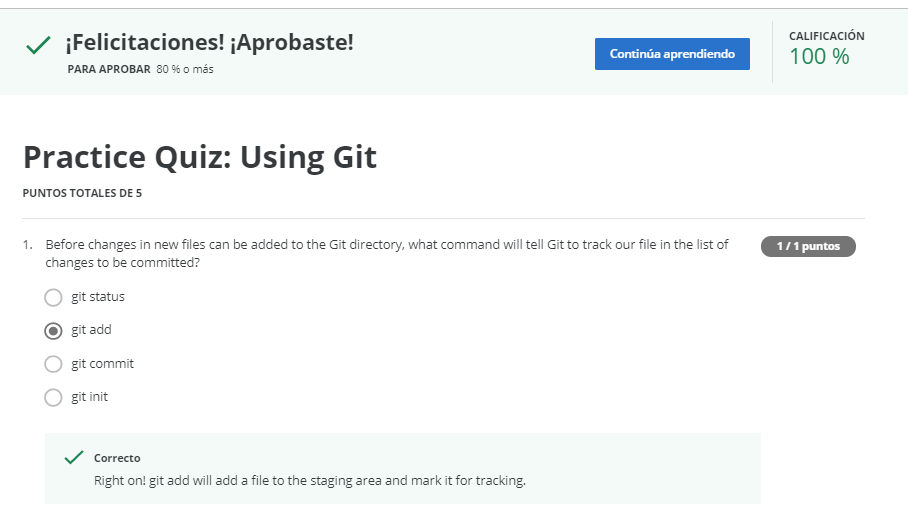

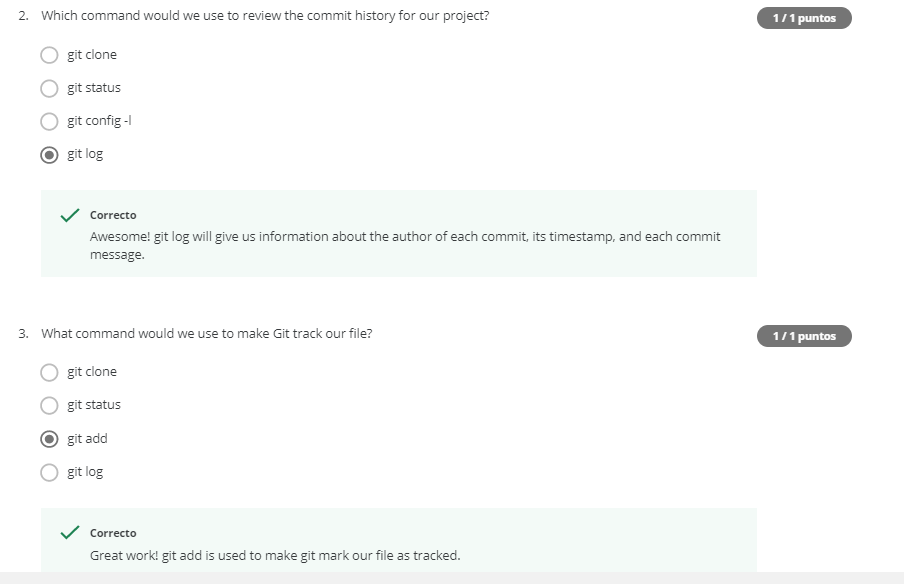

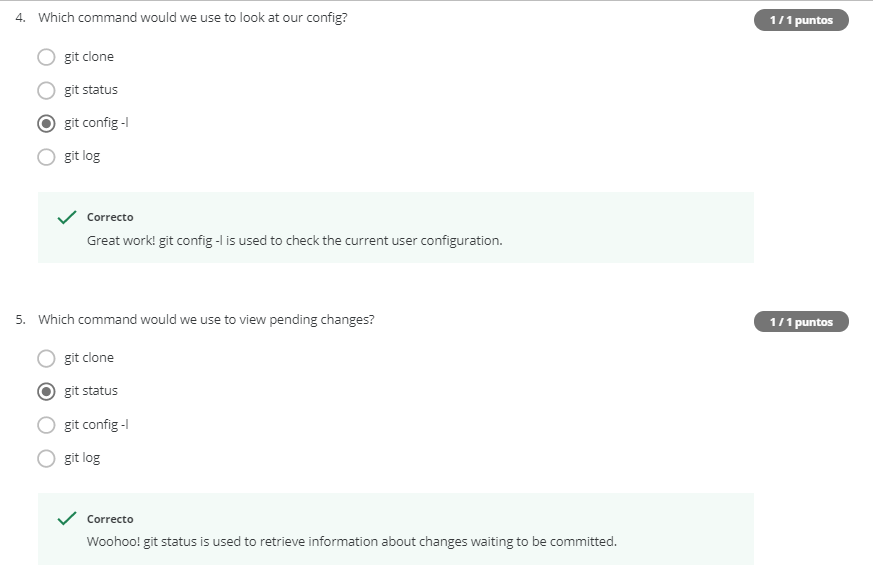

#  Week 2: Introduction to
## Advanced Git interaction
### Git and GitHub

Command	Explanation & Link
* git commit -a	Stages files automatically
* git log -p	Produces patch text
* git show	Shows various objects
* git diff	Is similar to the Linux `diff` command, and can show the differences in various commits
* git diff --staged	An alias to --cached, this will show all staged files compared to the named commit
* git add -p	Allows a user to interactively review patches to add to the current commit
* git mv	Similar to the Linux `mv` command, this moves a file
* git rm	Similar to the Linux `rm` command, this deletes, or removes a file

* There are many useful git cheatsheets online as well. Please take some time to research and study a few, such as this one.
.gitignore files

.gitignore files are used to tell the git tool to intentionally ignore some files in a given Git repository. For example, this can be useful for configuration files or metadata files that a user may not want to check into the master branch. Check out more at: https://git-scm.com/docs/gitignore.

https://gist.github.com/octocat/9257657

### Quiz: Advanced Git Interaction

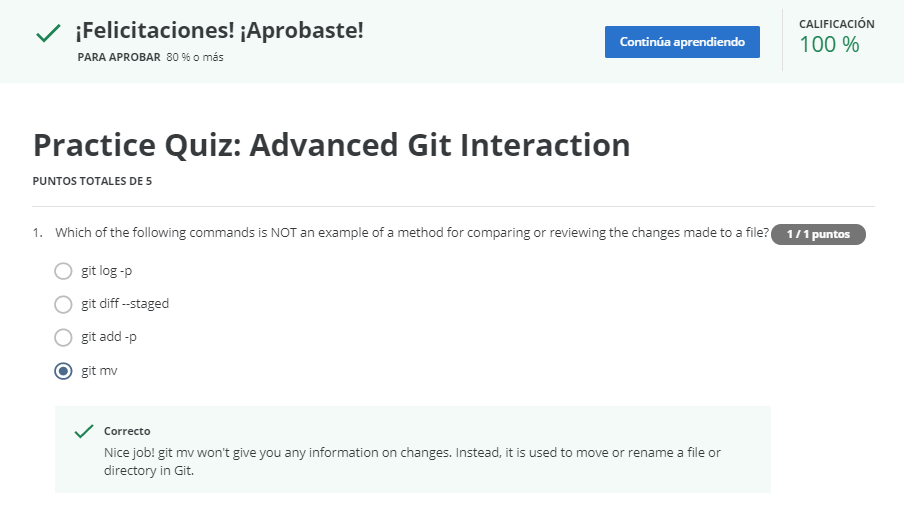

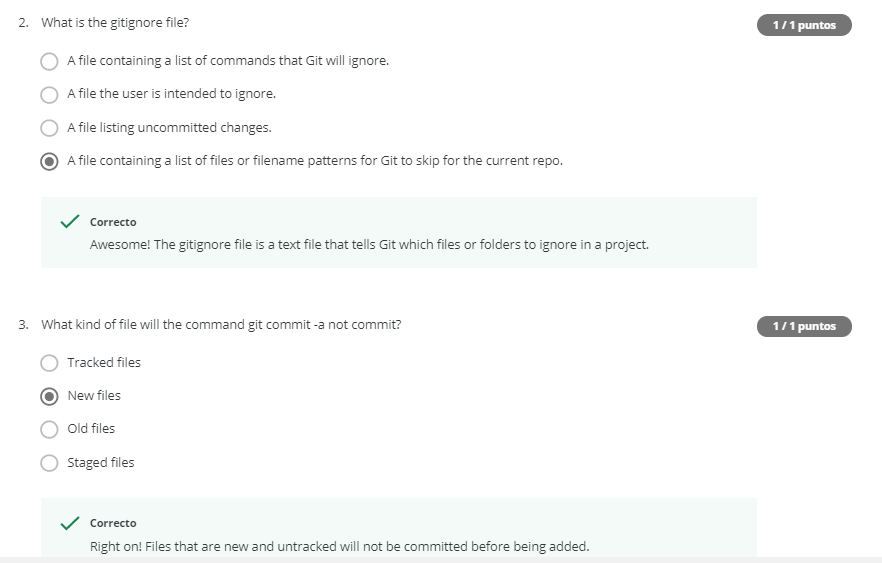

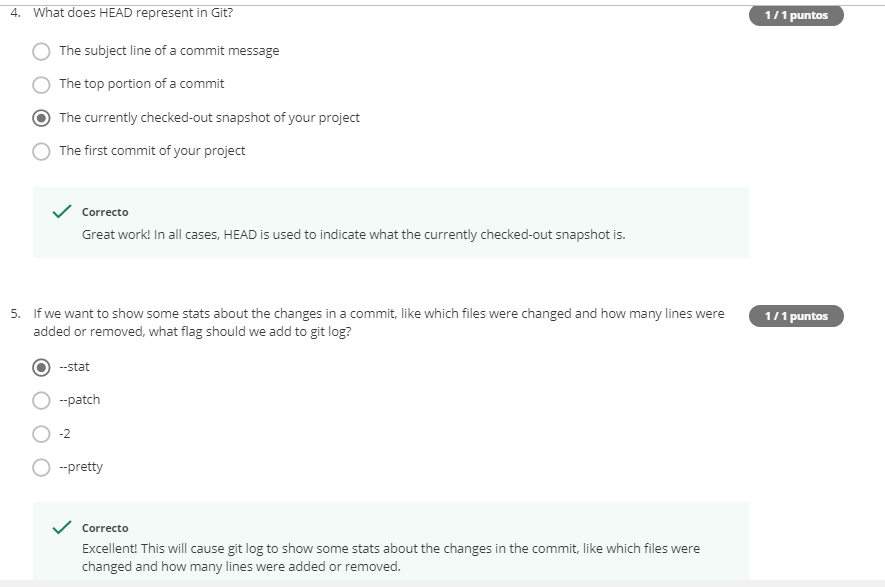

### Undoing Things
### Git Revert Cheat Sheet
* git checkout is effectively used to switch branches.

* git reset basically resets the repo, throwing away some changes. It’s somewhat difficult to understand, so reading the examples in the documentation may be a bit more useful.

* There are some other useful articles online, which discuss more aggressive approaches to resetting the repo.

* git commit --amend is used to make changes to commits after-the-fact, which can be useful for making notes about a given commit.

* git revert makes a new commit which effectively rolls back a previous commit. It’s a bit like an undo command.

* There are a few ways you can rollback commits in Git.

* There are some interesting considerations about how git object data is stored, such as the usage of sha-1.

* Feel free to read more here:

    https://en.wikipedia.org/wiki/SHA-1
    https://github.blog/2017-03-20-sha-1-collision-detection-on-github-com/
    
### Practice Quiz: Undoing Things

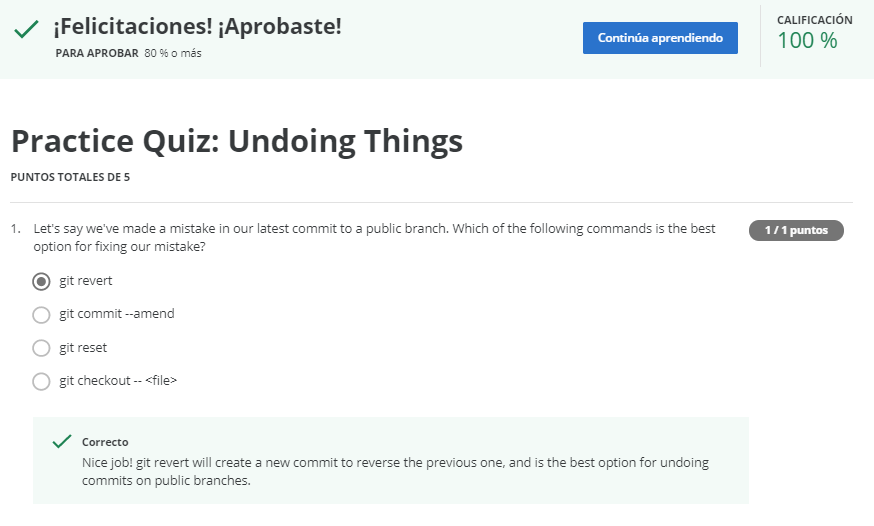

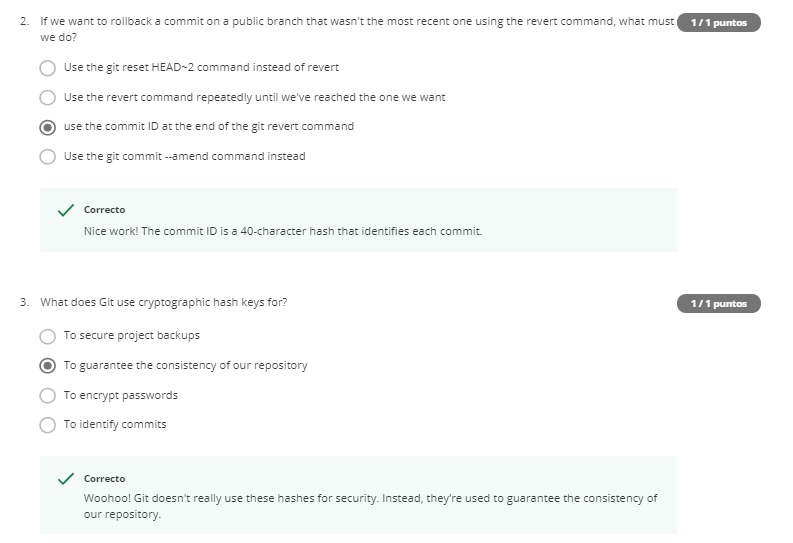

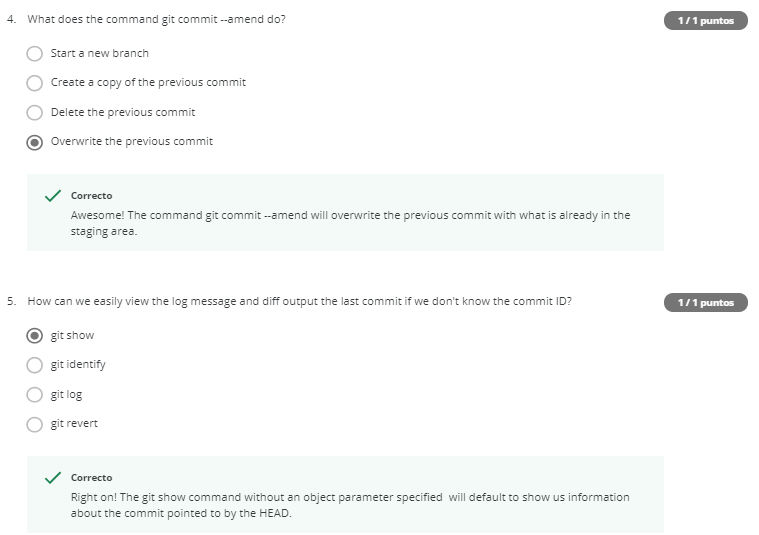

### Branching & Merging
###  Git Branches and Merging Cheat Sheet.
Command	Explanation & Link
* git branch	Used to manage branches
* git branch <name> 	Creates the branch
* git branch -d <name>	Deletes the branch
* git branch -D <name>	Forcibly deletes the branch
* git checkout <branch> 	Switches to a branch.
* git checkout -b <branch>	Creates a new branch and switches to it.
* git merge <branch> 	Merge joins branches together.
* git merge --abort	If there are merge conflicts (meaning files are incompatible), --abort can be used to abort the merge action.
* git log --graph --oneline	This shows a summarized view of the commit history for a repo.
    
### Practice Quiz: Branching & Merging    
    
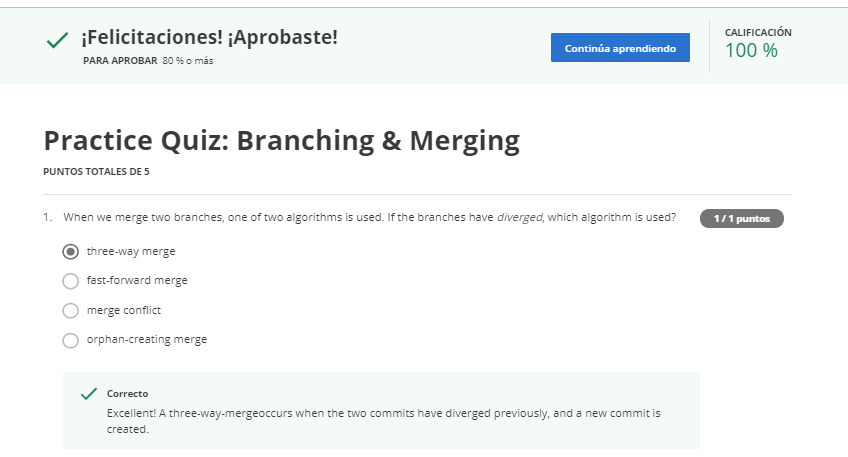

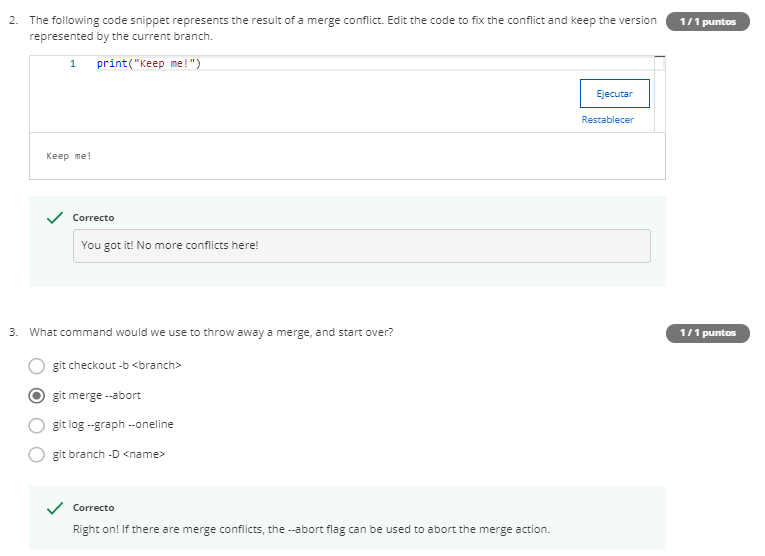

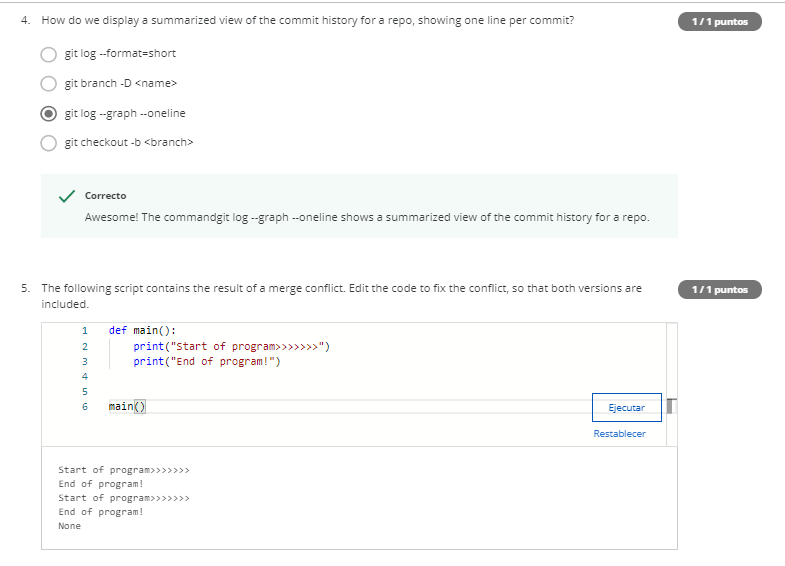

# Week 3 Introduction to Git and GitHub
## Introduction to GitHub
### Basic Interaction with GitHub Cheat-Sheet
There are various remote repository hosting sites:

    GitHub
    BitBucket
    Gitlab.

Follow the workflow at https://github.com/join to set up a free account, username, and password. After that, these steps will help you create a brand new repository on GitHub.

Some useful commands for getting started:
Command	Explanation & Link
git clone URL	Git clone is used to clone a remote repository into a local workspace
git push	Git push is used to push commits from your local repo to a remote repo
git pull	Git pull is used to fetch the newest updates from a remote repository

This can be useful for keeping your local workspace up to date.

    https://help.github.com/en/articles/caching-your-github-password-in-git
    https://help.github.com/en/articles/generating-an-ssh-key  
    
### Practice Quiz: Introduction to GitHub

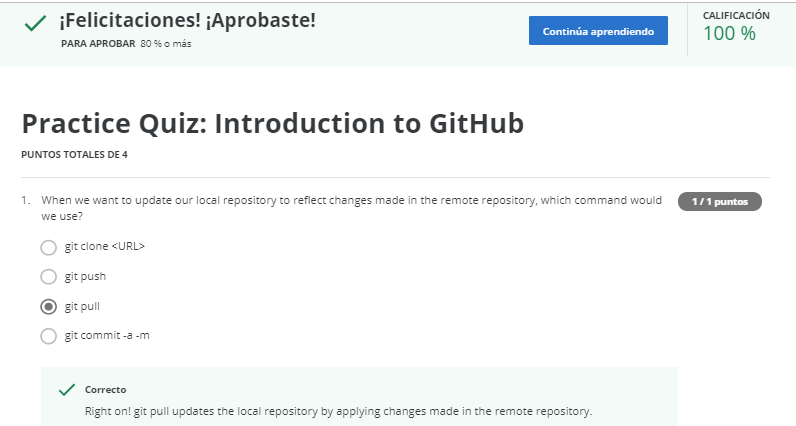

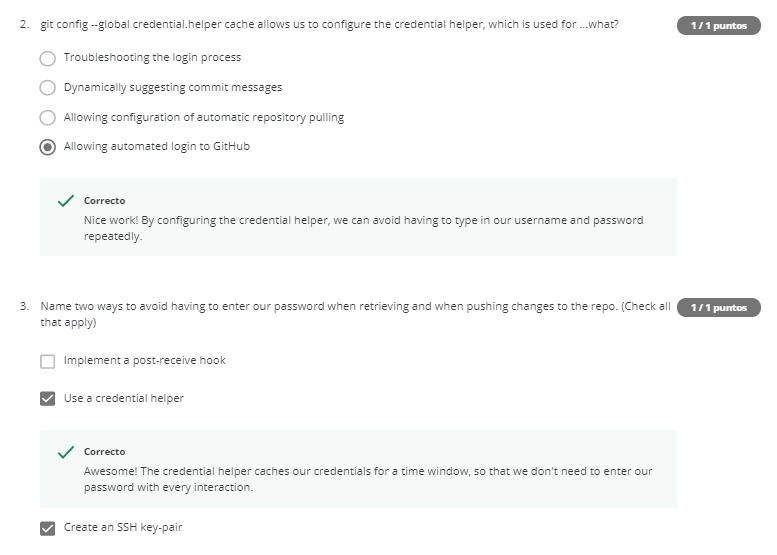

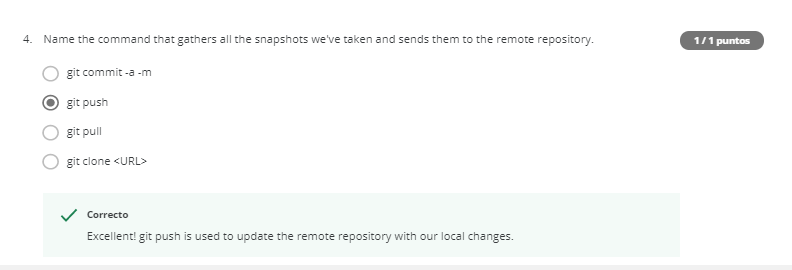

### Using a Remote Repository

### Git Remotes Cheat-Sheet

* Command	Explanation & Links
* git remote 	Lists remote repos
* git remote -v	List remote repos verbosely
* git remote show <name>	Describes a single remote repo
* git remote update	Fetches the most up-to-date objects
* git fetch	Downloads specific objects
* git branch -r	Lists remote branches; can be combined with other branch arguments to manage remote branches

#### Practice Quiz: Using a Remote Repository

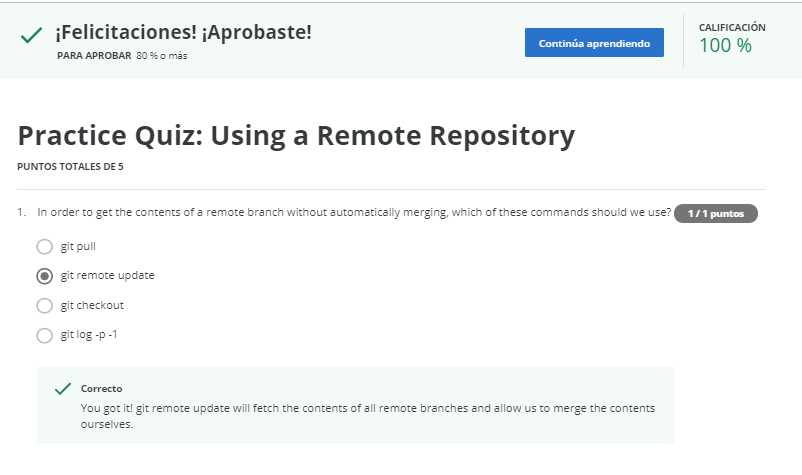

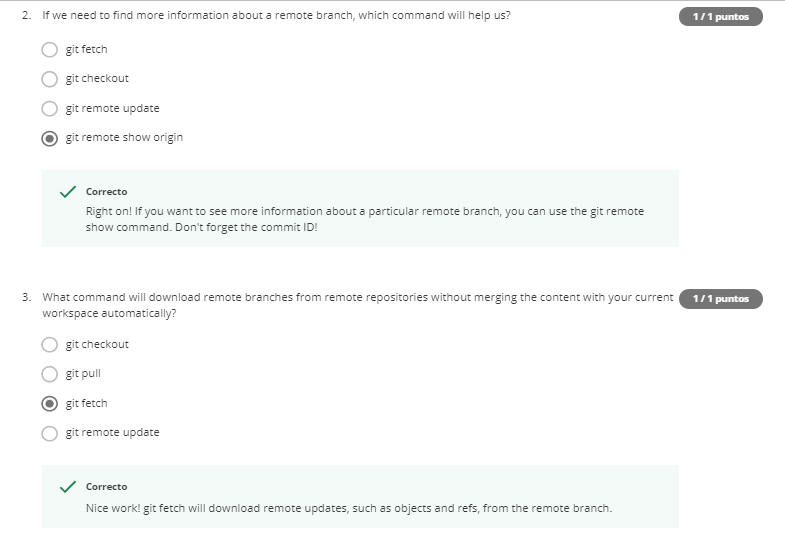

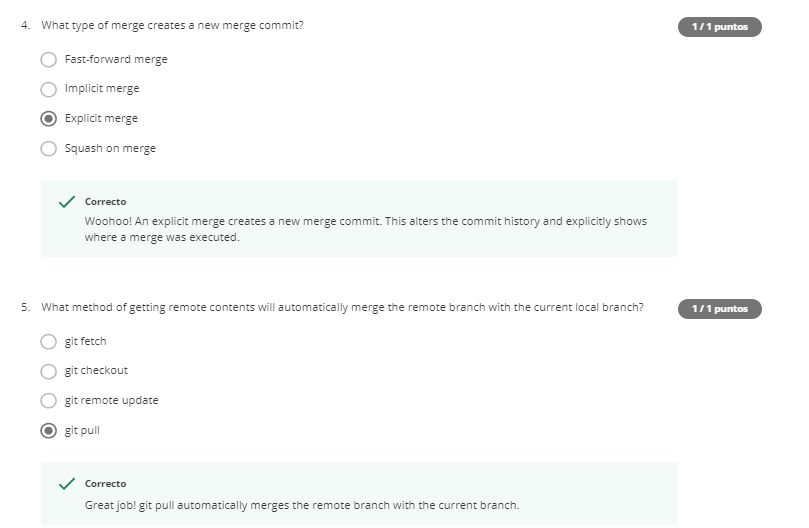

### Solving Conflicts

#### Conflict Resolution Cheat Sheet

Merge conflicts are not uncommon when working in a team of developers, or on Open Source Software. Fortunately, GitHub has some good documentation on how to handle them when they happen

    httpshelp.github.comengithubcollaborating-with-issues-and-pull-requestsabout-merge-conflicts
    httpshelp.github.comengithubcollaborating-with-issues-and-pull-requestsresolving-a-merge-conflict-using-the-command-line

You can also use git rebase branchname to change the base of the current branch to be branchname

#### Practice Quiz: Solving Conflicts

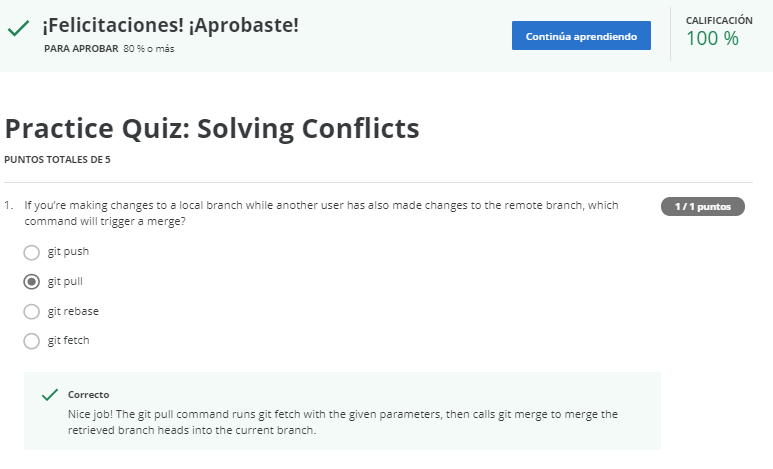

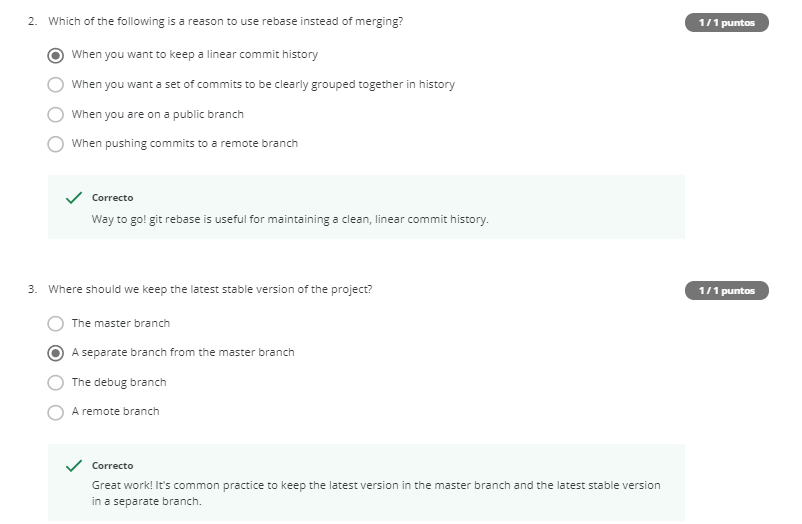

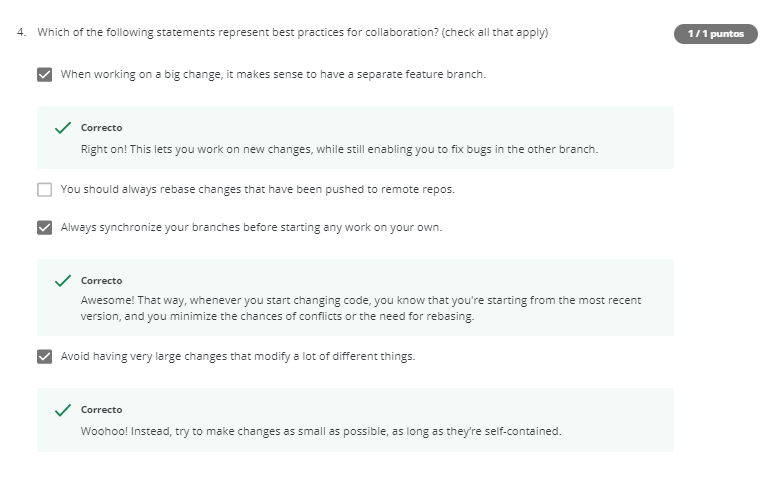

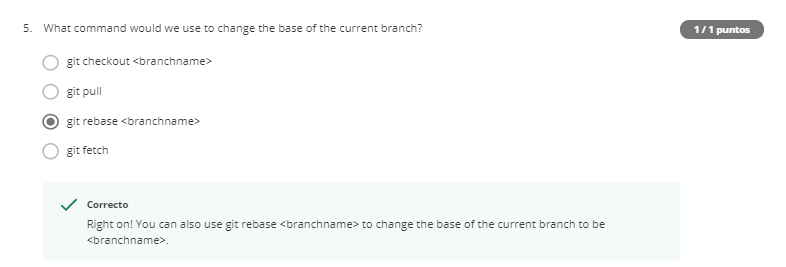

# Week 4 Collaboration
##  Pull Requests

### Git Fork and Pull Request Cheat Sheet
Check out the following link for more information:

https://help.github.com/en/articles/about-pull-request-merges

### Practice Quiz: Pull Requests
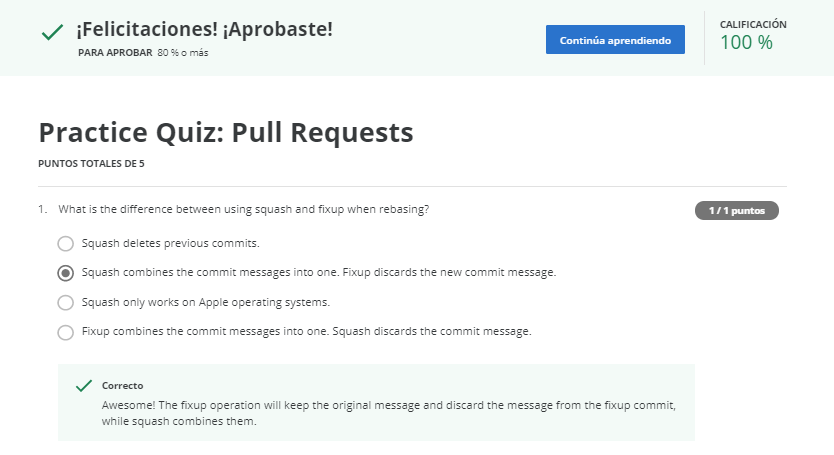

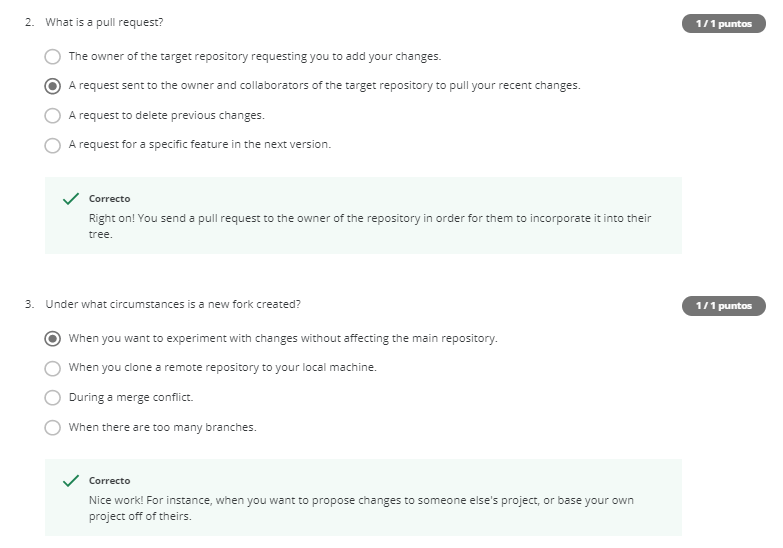

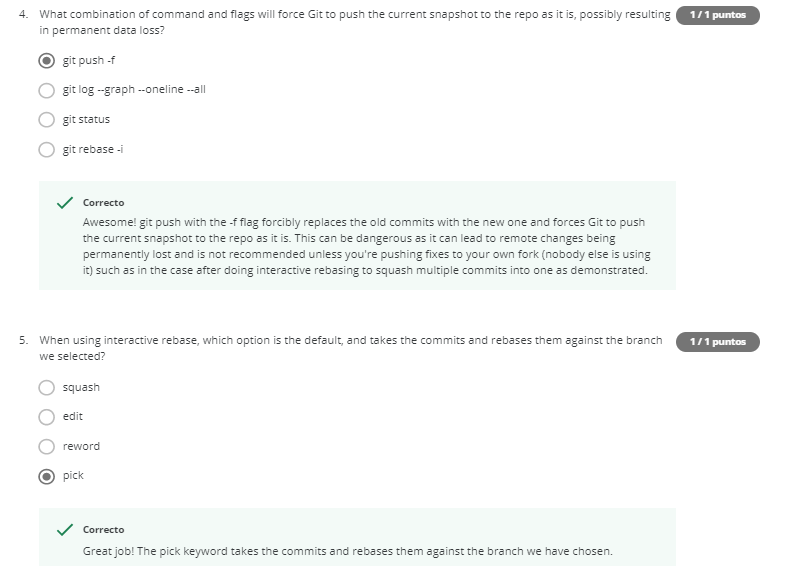

###  Code Reviews

### More Information on Code Reviews
Check out the following links for more information:

http://google.github.io/styleguide/
https://help.github.com/en/articles/about-pull-request-reviews
https://medium.com/osedea/the-perfect-code-review-process-845e6ba5c31
https://smartbear.com/learn/code-review/what-is-code-review/

### Practice Quiz: Code Reviews

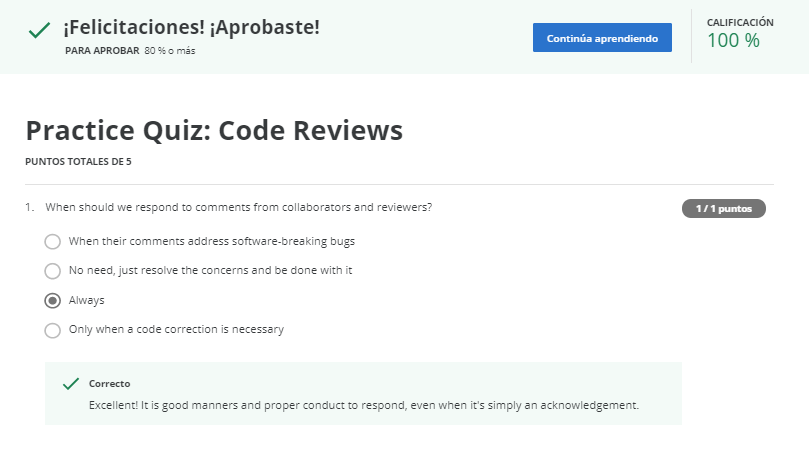

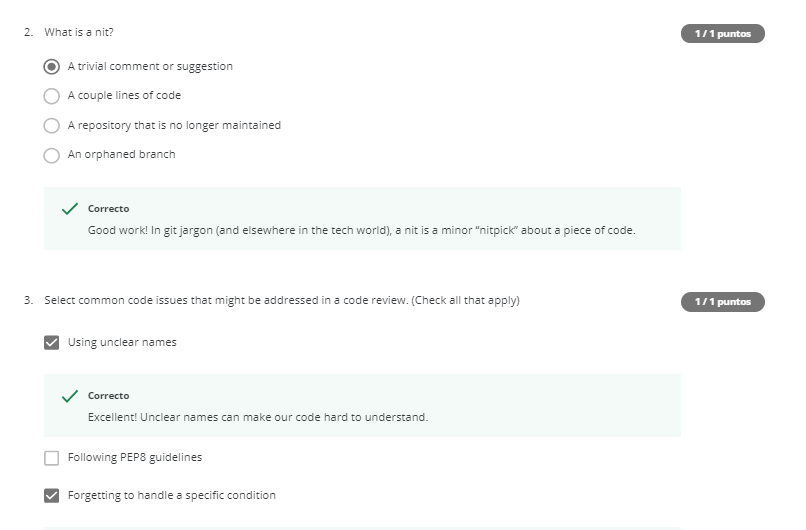

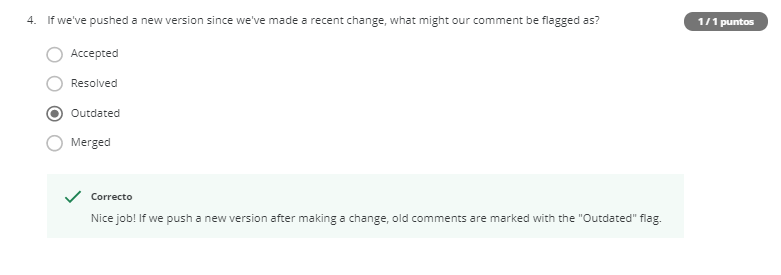

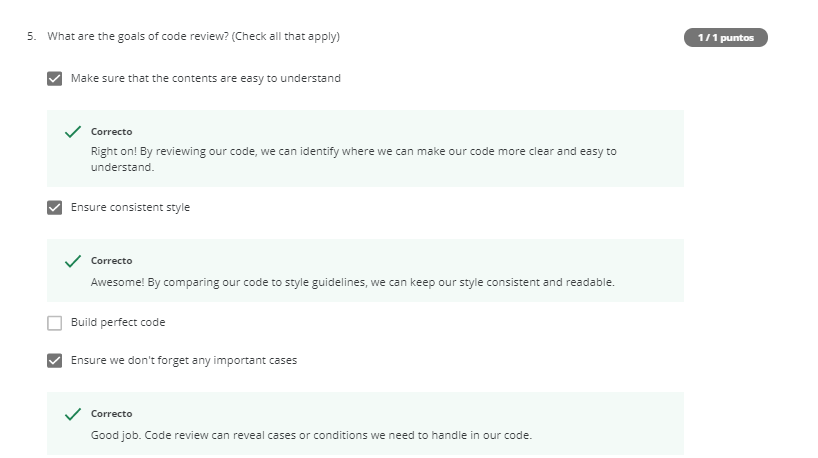

###  Managing Collaboration

#### Additional Tools
Check out the following links for more information:

* https://arp242.net/diy.html 
* https://help.github.com/en/articles/closing-issues-using-keywords
* https://help.github.com/en/articles/setting-guidelines-for-repository-contributors 
* https://www.infoworld.com/article/3271126/what-is-cicd-continuous-integration-and-continuous-delivery-explained.html
* https://stackify.com/what-is-cicd-whats-important-and-how-to-get-it-right/
* https://docs.travis-ci.com/user/tutorial/
* https://docs.travis-ci.com/user/build-stages/

#### Practice Quiz: Managing Collaboration

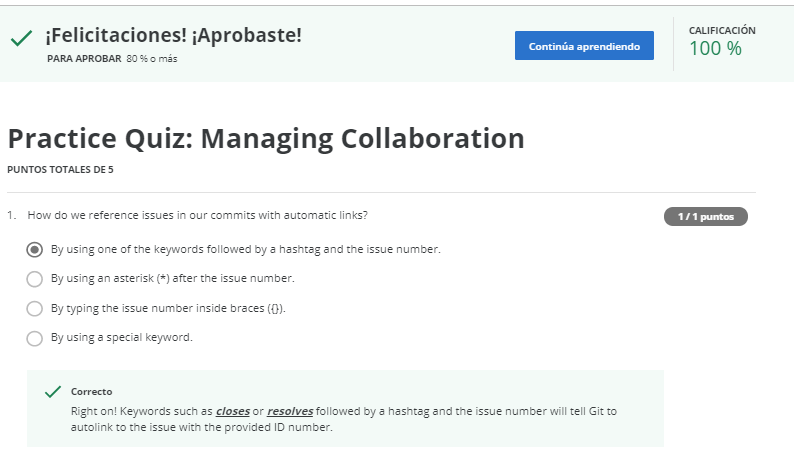

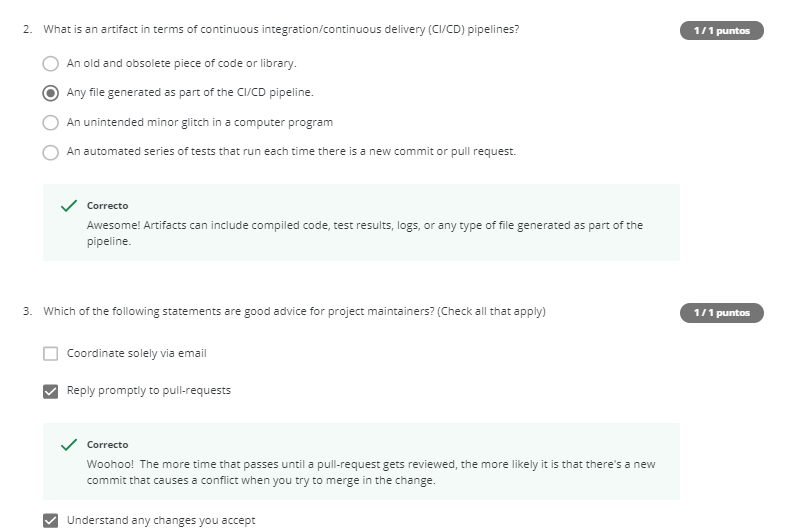

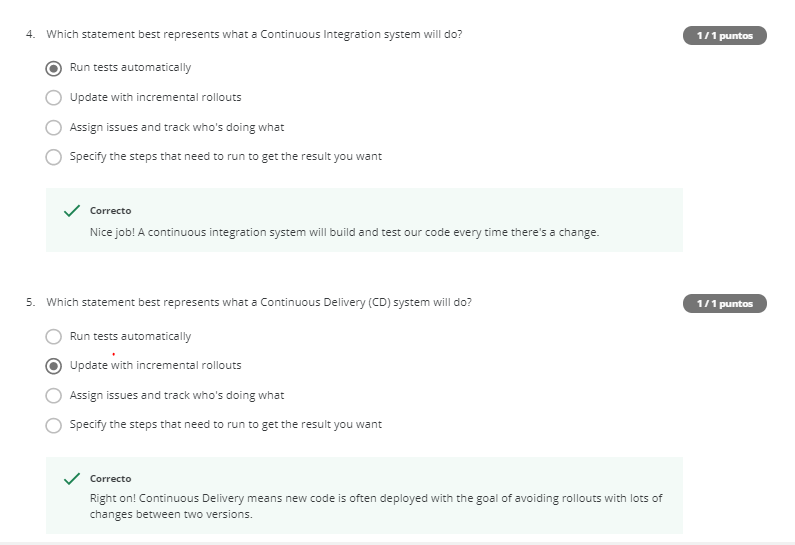